In [1]:
import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
    host='database-1.c3ieyo8m4v9o.ap-northeast-2.rds.amazonaws.com',
    port=3306,
    user='eda_team',
    password='123456',
    database='eda_project'
)
cur = conn.cursor()
cursor = conn.cursor(dictionary = True)
# cursor = conn.cursor(dictionary=True)

cursor.execute("select * from traffic_seoul")
result = cursor.fetchall()

df = pd.DataFrame(result)

In [2]:
df.head()

,date,start_si,end_si,traffic,time,distance
0,2021-01,경기도,경기도,56833700.0,22.86,8410.0
1,2021-02,경기도,경기도,56473000.0,22.84,8451.0
2,2021-03,경기도,경기도,69859400.0,23.07,8522.0
3,2021-04,경기도,경기도,70945400.0,23.31,8602.0
4,2021-05,경기도,경기도,70438800.0,23.31,8578.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      240 non-null    object 
 1   start_si  240 non-null    object 
 2   end_si    240 non-null    object 
 3   traffic   240 non-null    float64
 4   time      240 non-null    float64
 5   distance  240 non-null    float64
dtypes: float64(3), object(3)
memory usage: 11.4+ KB


In [10]:
df.columns

Index(['date', 'start_si', 'end_si', 'traffic', 'time', 'distance'], dtype='object')

In [3]:
seoul_gi = df[(df['start_si'] == '서울특별시') & (df['end_si'] == '경기도')]
gi_seoul = df[(df['start_si'] == '경기도') & (df['end_si'] == '서울특별시')]

seoul_inc = df[(df['start_si'] == '서울특별시') & (df['end_si'] == '인천광역시')]
inc_seoul = df[(df['start_si'] == '인천광역시') & (df['end_si'] == '서울특별시')]

seoul = df[(df['start_si'] == '서울특별시') & (df['end_si'] == '서울특별시')]
inc = df[(df['start_si'] == '인천광역시') & (df['end_si'] == '인천광역시')]

gi = df[(df['start_si'] == '경기도') & (df['end_si'] == '경기도')]


In [32]:
len(seoul_gi), len(gi_seoul), len(seoul_inc), len(inc_seoul)

(36, 36, 36, 36)

In [25]:
seoul_gi['distance'].sum()

861832.0

In [28]:
gi_seoul['distance'].sum()

867021.0

In [29]:
seoul_inc['distance'].sum()

1078613.0

In [30]:
inc_seoul['distance'].sum()

1068598.0

In [34]:
seoul['distance'].sum()

293947.0

In [35]:
inc['distance'].sum()

244018.0

In [36]:
gi['distance'].sum()

202324.0

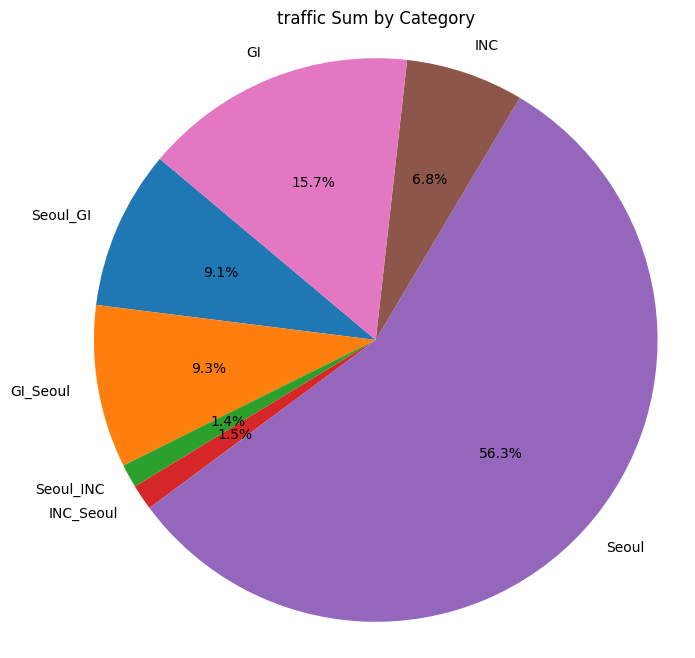

In [4]:
import matplotlib.pyplot as plt

labels = ['Seoul_GI', 'GI_Seoul', 'Seoul_INC', 'INC_Seoul', 'Seoul', 'INC', 'GI']
values = [seoul_gi['traffic'].sum(), gi_seoul['traffic'].sum(), seoul_inc['traffic'].sum(), inc_seoul['traffic'].sum(), seoul['traffic'].sum(), inc['traffic'].sum(), gi['traffic'].sum()]

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('traffic Sum by Category')
plt.show()

<Axes: >

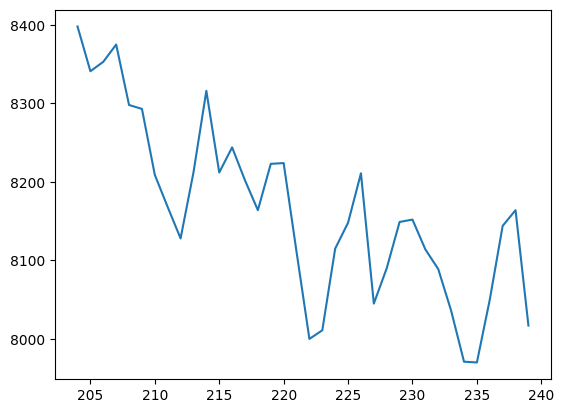

In [44]:
seoul['distance'].plot()

<Axes: >

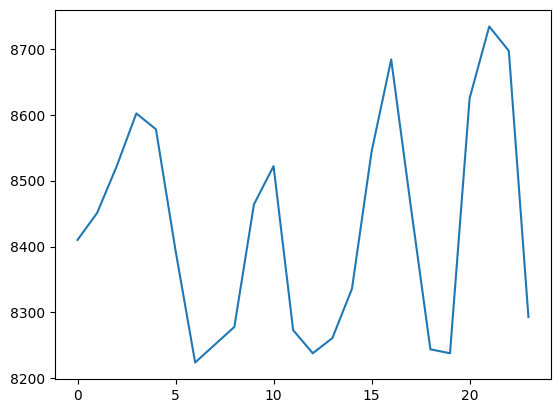

In [45]:
gi['distance'].plot()

<Axes: >

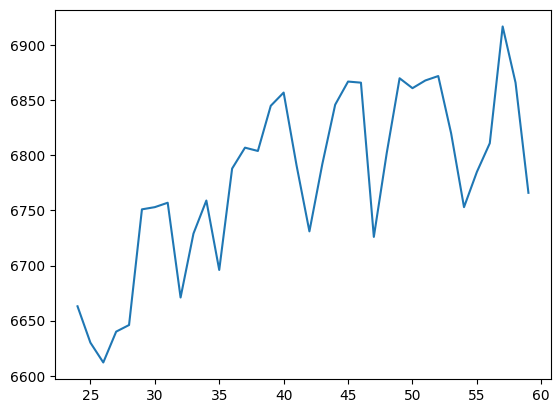

In [46]:
inc['distance'].plot()

<Axes: >

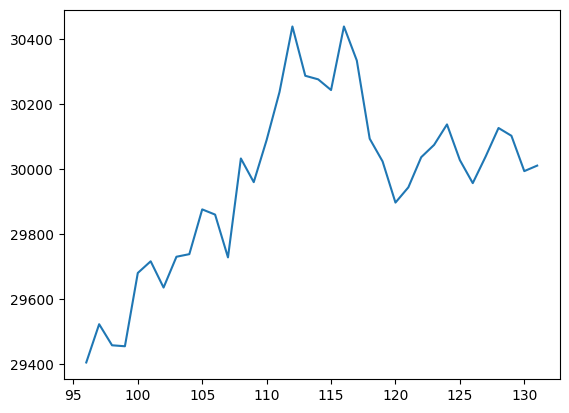

In [47]:
seoul_inc['distance'].plot()

<Axes: >

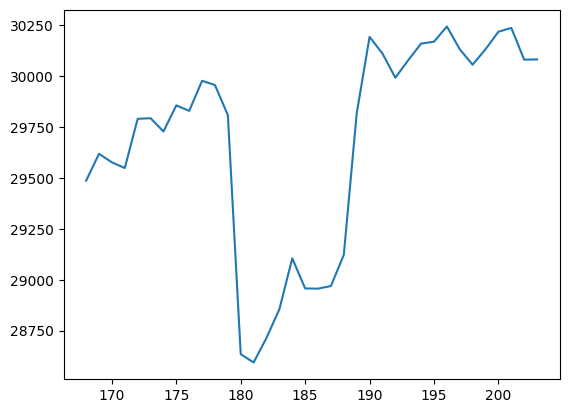

In [48]:
inc_seoul['distance'].plot()

<Axes: >

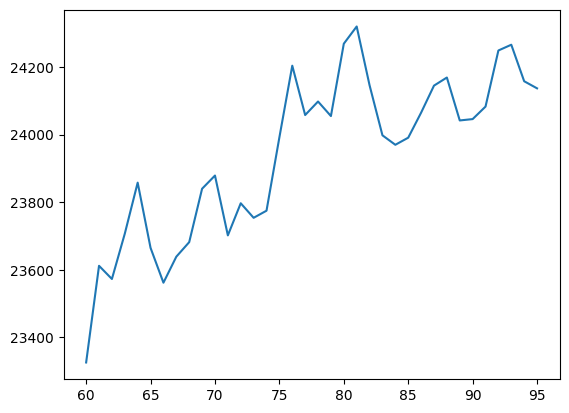

In [49]:
seoul_gi['distance'].plot()

<Axes: >

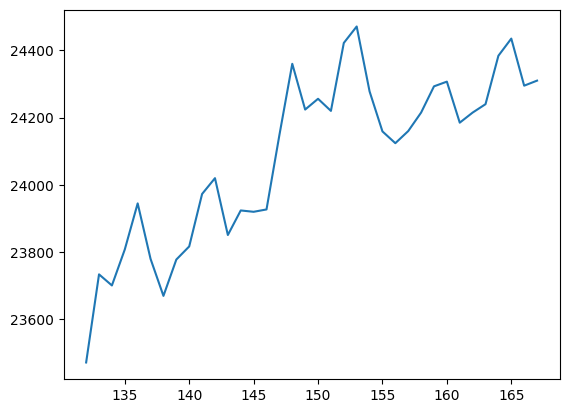

In [50]:
gi_seoul['distance'].plot()

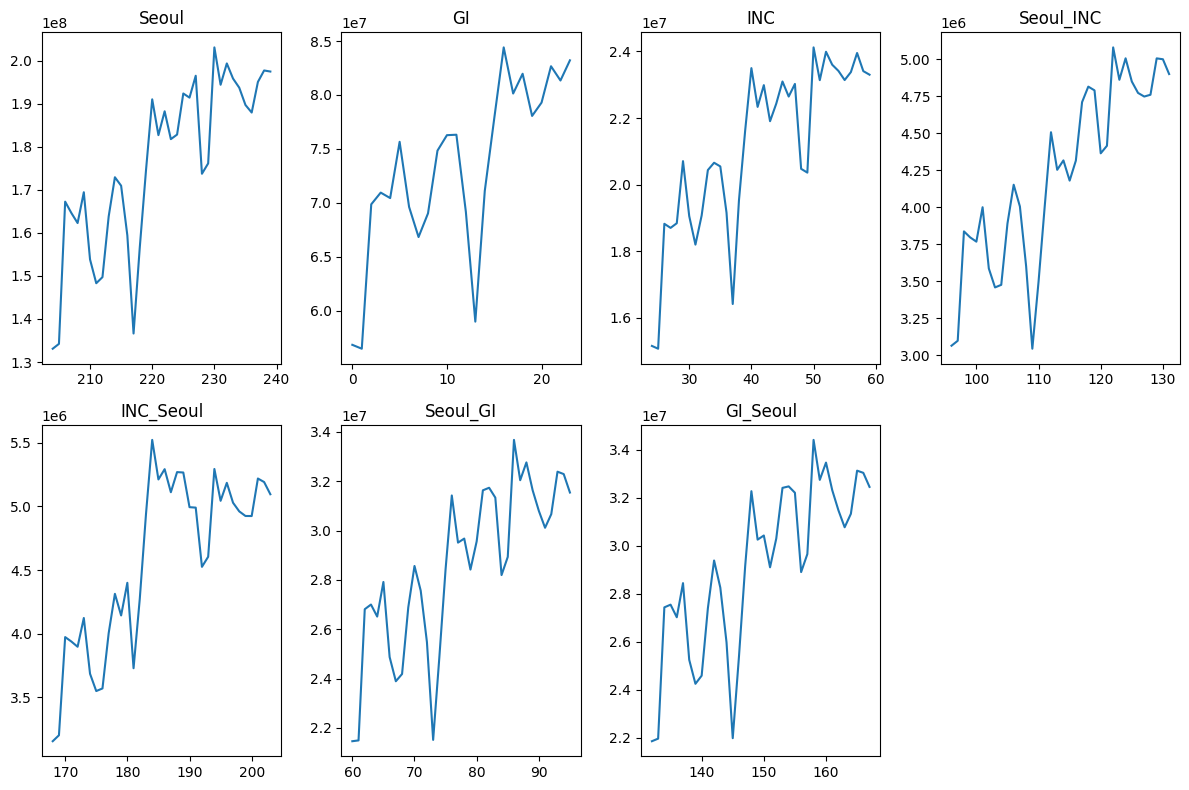

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.subplot(2, 4, 1)
seoul['traffic'].plot()
plt.title('Seoul')

plt.subplot(2, 4, 2)
gi['traffic'].plot()
plt.title('GI')

plt.subplot(2, 4, 3)
inc['traffic'].plot()
plt.title('INC')

plt.subplot(2, 4, 4)
seoul_inc['traffic'].plot()
plt.title('Seoul_INC')

plt.subplot(2, 4, 5)
inc_seoul['traffic'].plot()
plt.title('INC_Seoul')

plt.subplot(2, 4, 6)
seoul_gi['traffic'].plot()
plt.title('Seoul_GI')

plt.subplot(2, 4, 7)
gi_seoul['traffic'].plot()
plt.title('GI_Seoul')

plt.tight_layout()
plt.show()


In [53]:
inc_seoul

,date,start_si,end_si,traffic,time,distance
168,2021-01,인천광역시,서울특별시,3156060.0,63.26,29487.0
169,2021-02,인천광역시,서울특별시,3202710.0,63.73,29619.0
170,2021-03,인천광역시,서울특별시,3973710.0,63.56,29577.0
171,2021-04,인천광역시,서울특별시,3938740.0,63.45,29549.0
172,2021-05,인천광역시,서울특별시,3897800.0,64.20,29791.0
173,2021-06,인천광역시,서울특별시,4123560.0,63.87,29794.0
174,2021-07,인천광역시,서울특별시,3685740.0,63.43,29729.0
175,2021-08,인천광역시,서울특별시,3549930.0,63.73,29857.0
176,2021-09,인천광역시,서울특별시,3570450.0,64.35,29830.0
177,2021-10,인천광역시,서울특별시,4004900.0,65.22,29978.0


In [54]:
conn = mysql.connector.connect(
    host='database-1.c3ieyo8m4v9o.ap-northeast-2.rds.amazonaws.com',
    port=3306,
    user='eda_team',
    password='123456',
    database='eda_project'
)
cur = conn.cursor()
cursor = conn.cursor(dictionary = True)
# cursor = conn.cursor(dictionary=True)

cursor.execute("select * from gihu_service1")
result = cursor.fetchall()

df_gihu1 = pd.DataFrame(result)
df_gihu1.head()

,이름,노선,승차가능,하차가능,판매여부,충전여부,사용정지
0,가산디지털단지,1호선,O,O,X,X,X
1,간석,1호선,X,X,X,X,X
2,개봉,1호선,O,O,X,X,X
3,관악,1호선,X,X,X,X,X
4,광명,1호선,X,X,X,X,X


In [7]:
conn = mysql.connector.connect(
    host='database-1.c3ieyo8m4v9o.ap-northeast-2.rds.amazonaws.com',
    port=3306,
    user='eda_team',
    password='123456',
    database='eda_project'
)
cur = conn.cursor()
cursor = conn.cursor(dictionary = True)
# cursor = conn.cursor(dictionary=True)

cursor.execute("select * from gihu_service2")
result = cursor.fetchall()

df_gihu2 = pd.DataFrame(result)
df_gihu2.head()

,노선번호,승하차
0,0017,O
1,01A,O
2,01B,O
3,0411,O
4,100,O


In [8]:
conn.close()

In [67]:
conn = mysql.connector.connect(
    host='database-1.c3ieyo8m4v9o.ap-northeast-2.rds.amazonaws.com',
    port=3306,
    user='eda_team',
    password='123456',
    database='eda_project'
)
cur = conn.cursor()
cursor = conn.cursor(dictionary = True)
# cursor = conn.cursor(dictionary=True)

cursor.execute("select * from seoul_목적_22to24")
result = cursor.fetchall()

seahun1 = pd.DataFrame(result)
seahun1.head()

,시도,이용자유형,연월,합계발생량,합계도착량,4시발생량,4시도착량,5시발생량,5시도착량,6시발생량,...,23시발생량,23시도착량,24시발생량,24시도착량,1시발생량,1시도착량,2시발생량,2시도착량,3시발생량,3시도착량
0,서울특별시,~,2022,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,서울특별시,경로,2022,240404045,238070066,283184,6038,6713419,2384970,8058472,...,592438,1229706,44557,186631,899,7100,112,387,2,38
2,서울특별시,국가유공자,2022,6173486,4685350,22128,7234,113746,55317,187183,...,38056,35887,10367,10500,2174,1493,1032,560,1155,384
3,서울특별시,어린이,2022,19130485,18431718,1528,382,11560,3983,38819,...,31425,65417,3774,9352,393,846,113,144,81,62
4,서울특별시,외국인,2022,1773150,1754366,1390,46,40573,10268,31055,...,26442,39552,3716,11608,78,782,6,34,0,0


In [68]:
conn = mysql.connector.connect(
    host='database-1.c3ieyo8m4v9o.ap-northeast-2.rds.amazonaws.com',
    port=3306,
    user='eda_team',
    password='123456',
    database='eda_project'
)
cur = conn.cursor()
cursor = conn.cursor(dictionary = True)
# cursor = conn.cursor(dictionary=True)

cursor.execute("select * from seoul_수단_22to24")
result = cursor.fetchall()

seahun2 = pd.DataFrame(result)
seahun2.head()

,시도,연월,이용자유형,교통수단,합계발생량,합계도착량,4시발생량,4시도착량,5시발생량,5시도착량,...,23시발생량,23시도착량,24시발생량,24시도착량,1시발생량,1시도착량,2시발생량,2시도착량,3시발생량,3시도착량
0,서울특별시,2022,~,기타버스,19,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,서울특별시,2022,경로,도시철도,240399688,238214621,283183,6064,6713388,2399736,...,592434,1228248,44557,184848,899,6265,112,239,2,10
2,서울특별시,2022,국가유공자,도시철도,2864321,2840783,1767,177,54062,16174,...,14731,24250,1495,6081,24,240,0,1,0,0
3,서울특별시,2022,국가유공자,시내,3309165,1844883,20361,7057,59684,39149,...,23325,11645,8872,4421,2150,1257,1032,559,1155,384
4,서울특별시,2022,어린이,공항버스,14066,25,536,0,865,0,...,5,0,0,0,0,0,0,0,3,0


In [56]:
df_gihu1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      682 non-null    object
 1   노선      682 non-null    object
 2   승차가능    682 non-null    object
 3   하차가능    682 non-null    object
 4   판매여부    682 non-null    object
 5   충전여부    682 non-null    object
 6   사용정지    682 non-null    object
dtypes: object(7)
memory usage: 37.4+ KB


In [58]:
df_gihu2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   노선번호    632 non-null    object
 1   승하차     632 non-null    object
dtypes: object(2)
memory usage: 10.0+ KB


In [69]:
seahun1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 53 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      29 non-null     object
 1   이용자유형   29 non-null     object
 2   연월      29 non-null     int64 
 3   합계발생량   29 non-null     int64 
 4   합계도착량   29 non-null     int64 
 5   4시발생량   29 non-null     int64 
 6   4시도착량   29 non-null     int64 
 7   5시발생량   29 non-null     int64 
 8   5시도착량   29 non-null     int64 
 9   6시발생량   29 non-null     int64 
 10  6시도착량   29 non-null     int64 
 11  7시발생량   29 non-null     int64 
 12  7시도착량   29 non-null     int64 
 13  8시발생량   29 non-null     int64 
 14  8시도착량   29 non-null     int64 
 15  9시발생량   29 non-null     int64 
 16  9시도착량   29 non-null     int64 
 17  10시발생량  29 non-null     int64 
 18  10시도착량  29 non-null     int64 
 19  11시발생량  29 non-null     int64 
 20  11시도착량  29 non-null     int64 
 21  12시발생량  29 non-null     int64 
 22  12시도착량  29 non-null     int6

In [70]:
seahun2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      133 non-null    object
 1   연월      133 non-null    int64 
 2   이용자유형   133 non-null    object
 3   교통수단    133 non-null    object
 4   합계발생량   133 non-null    int64 
 5   합계도착량   133 non-null    int64 
 6   4시발생량   133 non-null    int64 
 7   4시도착량   133 non-null    int64 
 8   5시발생량   133 non-null    int64 
 9   5시도착량   133 non-null    int64 
 10  6시발생량   133 non-null    int64 
 11  6시도착량   133 non-null    int64 
 12  7시발생량   133 non-null    int64 
 13  7시도착량   133 non-null    int64 
 14  8시발생량   133 non-null    int64 
 15  8시도착량   133 non-null    int64 
 16  9시발생량   133 non-null    int64 
 17  9시도착량   133 non-null    int64 
 18  10시발생량  133 non-null    int64 
 19  10시도착량  133 non-null    int64 
 20  11시발생량  133 non-null    int64 
 21  11시도착량  133 non-null    int64 
 22  12시발생량  133 non-null    in

In [62]:
df_gihu1['이름'].value_counts()

이름
김포공항    5
청량리     4
서울역     4
공덕      4
왕십리     4
       ..
수유      1
수리산     1
선바위     1
상록수     1
화계      1
Name: count, Length: 556, dtype: int64

In [63]:
df_gihu1['노선'].value_counts()

노선
1호선       102
수인분당       63
경의중앙       57
5호선        56
7호선        53
4호선        51
2호선        51
3호선        44
6호선        39
9호선        38
경춘         25
서해         21
8호선        18
신분당        16
공항철도       14
우이신설       13
신림         11
김포골드라인     10
Name: count, dtype: int64

In [84]:
seahun1.columns

Index(['시도', '이용자유형', '연월', '합계발생량', '합계도착량', '4시발생량', '4시도착량', '5시발생량',
       '5시도착량', '6시발생량', '6시도착량', '7시발생량', '7시도착량', '8시발생량', '8시도착량', '9시발생량',
       '9시도착량', '10시발생량', '10시도착량', '11시발생량', '11시도착량', '12시발생량', '12시도착량',
       '13시발생량', '13시도착량', '14시발생량', '14시도착량', '15시발생량', '15시도착량', '16시발생량',
       '16시도착량', '17시발생량', '17시도착량', '18시발생량', '18시도착량', '19시발생량', '19시도착량',
       '20시발생량', '20시도착량', '21시발생량', '21시도착량', '22시발생량', '22시도착량', '23시발생량',
       '23시도착량', '24시발생량', '24시도착량', '1시발생량', '1시도착량', '2시발생량', '2시도착량',
       '3시발생량', '3시도착량'],
      dtype='object')

In [80]:
seahun2.columns

Index(['시도', '연월', '이용자유형', '교통수단', '합계발생량', '합계도착량', '4시발생량', '4시도착량',
       '5시발생량', '5시도착량', '6시발생량', '6시도착량', '7시발생량', '7시도착량', '8시발생량', '8시도착량',
       '9시발생량', '9시도착량', '10시발생량', '10시도착량', '11시발생량', '11시도착량', '12시발생량',
       '12시도착량', '13시발생량', '13시도착량', '14시발생량', '14시도착량', '15시발생량', '15시도착량',
       '16시발생량', '16시도착량', '17시발생량', '17시도착량', '18시발생량', '18시도착량', '19시발생량',
       '19시도착량', '20시발생량', '20시도착량', '21시발생량', '21시도착량', '22시발생량', '22시도착량',
       '23시발생량', '23시도착량', '24시발생량', '24시도착량', '1시발생량', '1시도착량', '2시발생량',
       '2시도착량', '3시발생량', '3시도착량'],
      dtype='object')

In [83]:
seahun1['연월'].value_counts()

연월
2022      8
2023      7
202401    7
202402    7
Name: count, dtype: int64

In [92]:
seahun2['교통수단'].value_counts()

교통수단
도시철도    28
시내      22
광역      21
마을      21
좌석      21
공항버스    18
기타버스     2
Name: count, dtype: int64

In [86]:
seahun1[seahun1['이용자유형'] == '~'] # 첫줄 ?

,시도,이용자유형,연월,합계발생량,합계도착량,4시발생량,4시도착량,5시발생량,5시도착량,6시발생량,...,23시발생량,23시도착량,24시발생량,24시도착량,1시발생량,1시도착량,2시발생량,2시도착량,3시발생량,3시도착량
0,서울특별시,~,2022,19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
seahun2.groupby("이용자유형")[['4시발생량', '4시도착량',
       '5시발생량', '5시도착량', '6시발생량', '6시도착량', '7시발생량', '7시도착량', '8시발생량', '8시도착량',
       '9시발생량', '9시도착량', '10시발생량', '10시도착량', '11시발생량', '11시도착량', '12시발생량',
       '12시도착량']].mean()

,4시발생량,4시도착량,5시발생량,5시도착량,6시발생량,6시도착량,7시발생량,7시도착량,8시발생량,8시도착량,9시발생량,9시도착량,10시발생량,10시도착량,11시발생량,11시도착량,12시발생량,12시도착량
이용자유형,,,,,,,,,,,,,,,,,,
~,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
경로,92814.947368,39984.578947,8.864625e+05,3.900312e+05,1.064022e+06,1.148453e+06,1.240050e+06,1.214477e+06,1.663686e+06,1.631308e+06,2.161456e+06,2.122728e+06,2.421608e+06,2.491129e+06,2.493162e+06,2.681215e+06,2.565841e+06,2.623165e+06
국가유공자,2632.411765,1065.941176,1.419041e+04,8.009529e+03,2.401188e+04,1.977147e+04,3.758529e+04,3.006718e+04,4.742518e+04,4.855994e+04,5.431882e+04,4.690971e+04,6.077976e+04,5.502229e+04,6.174276e+04,5.611941e+04,6.275194e+04,5.602988e+04
어린이,282.041667,50.583333,1.488125e+03,5.655000e+02,4.700542e+03,2.879292e+03,4.900825e+04,3.053388e+04,1.393782e+05,1.409842e+05,7.338654e+04,7.264379e+04,8.586479e+04,8.902604e+04,9.964967e+04,1.008110e+05,1.353141e+05,1.294177e+05
외국인,560.000000,19.000000,1.438025e+04,3.506250e+03,1.514975e+04,1.517925e+04,2.151275e+04,1.701850e+04,4.027025e+04,2.988650e+04,7.416825e+04,5.697125e+04,1.017382e+05,8.866700e+04,1.170292e+05,1.095308e+05,1.184245e+05,1.152992e+05
일반인,802444.720000,472533.760000,3.232696e+06,2.121144e+06,6.892212e+06,5.840618e+06,1.714663e+07,1.387361e+07,2.230440e+07,2.854450e+07,1.409158e+07,1.885508e+07,1.015579e+07,1.184612e+07,1.005849e+07,1.060252e+07,1.117350e+07,1.119769e+07
장애인,20818.526316,8886.947368,1.602093e+05,7.321774e+04,2.112546e+05,2.083142e+05,3.233147e+05,2.802476e+05,3.955186e+05,4.548562e+05,3.729317e+05,3.998915e+05,3.797838e+05,3.865699e+05,4.103237e+05,4.062182e+05,4.419345e+05,4.299750e+05
청소년,2435.166667,1426.833333,2.020917e+04,9.847292e+03,1.712100e+05,8.999046e+04,1.259611e+06,1.120553e+06,6.156500e+05,7.749738e+05,4.000975e+05,4.454270e+05,3.890631e+05,4.140812e+05,4.544467e+05,4.553428e+05,6.079338e+05,5.950252e+05


In [106]:
import numpy as np

for column in seahun1.columns:
    if seahun1[column].dtype == 'int64':
        seahun1[column] = seahun1[column].astype(float)

for column in seahun2.columns:
    if seahun2[column].dtype == 'int64':
        seahun2[column] = seahun2[column].astype(float)

In [109]:
seahun2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도      133 non-null    object 
 1   연월      133 non-null    float64
 2   이용자유형   133 non-null    object 
 3   교통수단    133 non-null    object 
 4   합계발생량   133 non-null    float64
 5   합계도착량   133 non-null    float64
 6   4시발생량   133 non-null    float64
 7   4시도착량   133 non-null    float64
 8   5시발생량   133 non-null    float64
 9   5시도착량   133 non-null    float64
 10  6시발생량   133 non-null    float64
 11  6시도착량   133 non-null    float64
 12  7시발생량   133 non-null    float64
 13  7시도착량   133 non-null    float64
 14  8시발생량   133 non-null    float64
 15  8시도착량   133 non-null    float64
 16  9시발생량   133 non-null    float64
 17  9시도착량   133 non-null    float64
 18  10시발생량  133 non-null    float64
 19  10시도착량  133 non-null    float64
 20  11시발생량  133 non-null    float64
 21  11시도착량  133 non-null    float64
 22  12

In [114]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
seahun2.groupby("이용자유형")[['4시발생량', '4시도착량',
       '5시발생량', '5시도착량', '6시발생량', '6시도착량', '7시발생량', '7시도착량', '8시발생량', '8시도착량',
       '9시발생량', '9시도착량', '10시발생량', '10시도착량', '11시발생량', '11시도착량', '12시발생량',
       '12시도착량', '13시발생량', '13시도착량', '14시발생량', '14시도착량', '15시발생량', '15시도착량',
       '16시발생량', '16시도착량', '17시발생량', '17시도착량', '18시발생량', '18시도착량', '19시발생량',
       '19시도착량', '20시발생량', '20시도착량', '21시발생량', '21시도착량', '22시발생량', '22시도착량',
       '23시발생량', '23시도착량', '24시발생량', '24시도착량', '1시발생량', '1시도착량', '2시발생량',
       '2시도착량', '3시발생량', '3시도착량']].mean()

,4시발생량,4시도착량,5시발생량,5시도착량,6시발생량
이용자유형,,,,,
~,0.00,0.00,0.00,0.00,0.00
경로,92814.95,39984.58,886462.53,390031.21,1064022.42
국가유공자,2632.41,1065.94,14190.41,8009.53,24011.88
어린이,282.04,50.58,1488.12,565.50,4700.54
외국인,560.00,19.00,14380.25,3506.25,15149.75
일반인,802444.72,472533.76,3232696.24,2121143.92,6892212.12
장애인,20818.53,8886.95,160209.26,73217.74,211254.58
청소년,2435.17,1426.83,20209.17,9847.29,171209.96


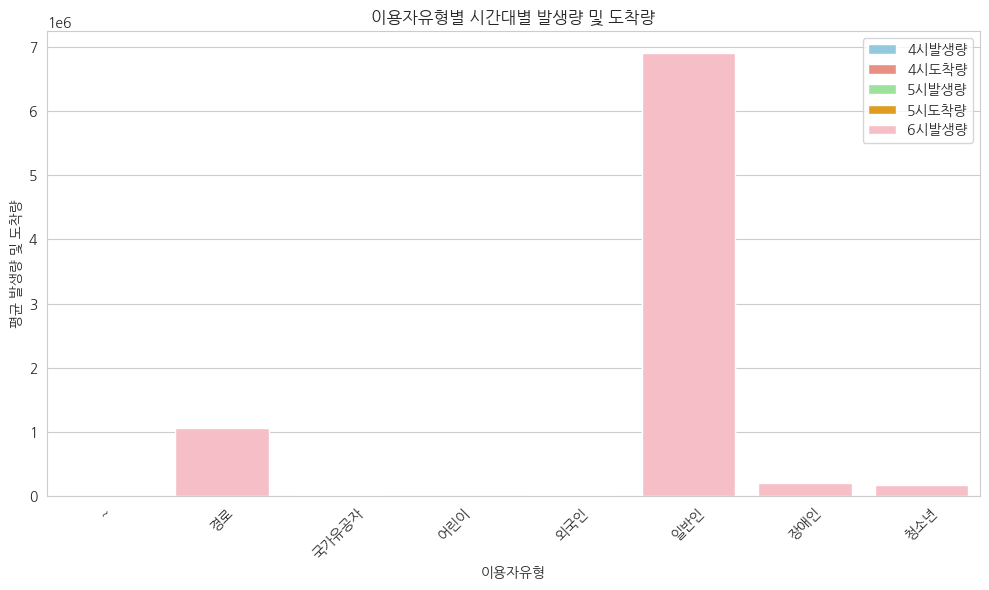

In [120]:
import seaborn as sns
import koreanize_matplotlib

plt.rcParams['font.family'] = 'NanumGothic'

# 그룹별 평균 데이터 생성
mean_data = seahun2.groupby("이용자유형")[['4시발생량', '4시도착량', '5시발생량', '5시도착량', '6시발생량']].mean().reset_index()

# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_data, x='이용자유형', y='4시발생량', color='skyblue', label='4시발생량')
sns.barplot(data=mean_data, x='이용자유형', y='4시도착량', color='salmon', label='4시도착량')
sns.barplot(data=mean_data, x='이용자유형', y='5시발생량', color='lightgreen', label='5시발생량')
sns.barplot(data=mean_data, x='이용자유형', y='5시도착량', color='orange', label='5시도착량')
sns.barplot(data=mean_data, x='이용자유형', y='6시발생량', color='lightpink', label='6시발생량')

# 범례 추가
plt.legend()

# 그래프 제목 추가 (선택 사항)
plt.title('이용자유형별 시간대별 발생량 및 도착량')

# y축 레이블 추가 (선택 사항)
plt.ylabel('평균 발생량 및 도착량')

# x축 레이블 추가 (선택 사항)
plt.xlabel('이용자유형')

# 그래프 보여주기
plt.xticks(rotation=45)  # x축 레이블 회전 (선택 사항)
plt.tight_layout()  # 그래프 간격 조절 (선택 사항)
plt.show()


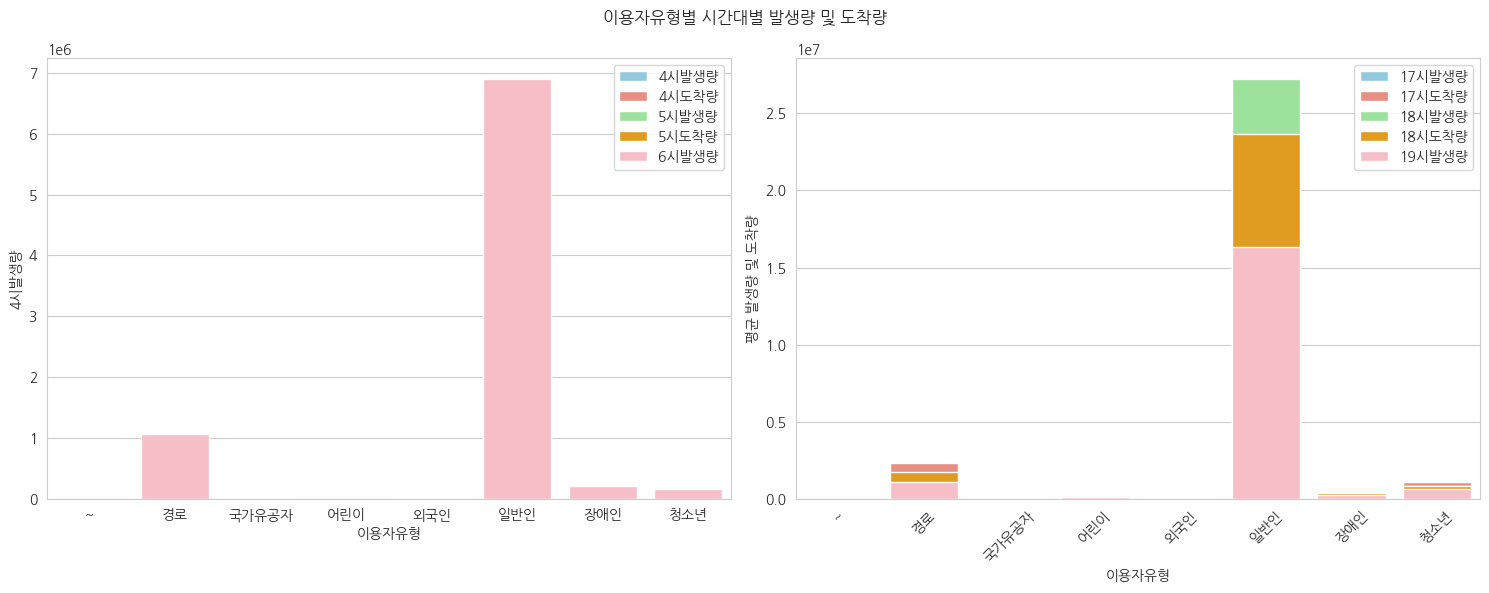

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

# 그룹별 평균 데이터 생성
mean_data = seahun2.groupby("이용자유형")[
    ['4시발생량', '4시도착량',
       '5시발생량', '5시도착량', '6시발생량', '6시도착량', '7시발생량', '7시도착량', '8시발생량', '8시도착량',
       '9시발생량', '9시도착량', '10시발생량', '10시도착량', '11시발생량', '11시도착량', '12시발생량',
       '12시도착량', '13시발생량', '13시도착량', '14시발생량', '14시도착량', '15시발생량', '15시도착량',
       '16시발생량', '16시도착량', '17시발생량', '17시도착량', '18시발생량', '18시도착량', '19시발생량',
       '19시도착량', '20시발생량', '20시도착량', '21시발생량', '21시도착량', '22시발생량', '22시도착량',
       '23시발생량', '23시도착량', '24시발생량', '24시도착량', '1시발생량', '1시도착량', '2시발생량',
       '2시도착량', '3시발생량', '3시도착량']
].mean().reset_index()

# 그래프 그리기
plt.figure(figsize=(15, 6))

# 첫 번째 subplot
plt.subplot(1, 2, 1)
sns.barplot(data=mean_data, x='이용자유형', y='4시발생량', color='skyblue', label='4시발생량')
sns.barplot(data=mean_data, x='이용자유형', y='4시도착량', color='salmon', label='4시도착량')
sns.barplot(data=mean_data, x='이용자유형', y='5시발생량', color='lightgreen', label='5시발생량')
sns.barplot(data=mean_data, x='이용자유형', y='5시도착량', color='orange', label='5시도착량')
sns.barplot(data=mean_data, x='이용자유형', y='6시발생량', color='lightpink', label='6시발생량')

# 범례 추가
plt.legend()

# 두 번째 subplot
plt.subplot(1, 2, 2)
sns.barplot(data=mean_data, x='이용자유형', y='17시발생량', color='skyblue', label='17시발생량')
sns.barplot(data=mean_data, x='이용자유형', y='17시도착량', color='salmon', label='17시도착량')
sns.barplot(data=mean_data, x='이용자유형', y='18시발생량', color='lightgreen', label='18시발생량')
sns.barplot(data=mean_data, x='이용자유형', y='18시도착량', color='orange', label='18시도착량')
sns.barplot(data=mean_data, x='이용자유형', y='19시발생량', color='lightpink', label='19시발생량')

# 범례 추가
plt.legend()

# 그래프 제목 추가 (선택 사항)
plt.suptitle('이용자유형별 시간대별 발생량 및 도착량')

# x축 레이블 추가 (선택 사항)
plt.xlabel('이용자유형')

# y축 레이블 추가 (선택 사항)
plt.ylabel('평균 발생량 및 도착량')

# 그래프 보여주기
plt.xticks(rotation=45)  # x축 레이블 회전 (선택 사항)
plt.tight_layout()  # 그래프 간격 조절 (선택 사항)
plt.show()


In [126]:
len(seahun2[seahun2['이용자유형'] == '일반인'])

25

In [129]:
human = seahun2[seahun2['이용자유형'] == '일반인']
human.head()

,시도,연월,이용자유형,교통수단,합계발생량,합계도착량,4시발생량,4시도착량,5시발생량,5시도착량,...,23시발생량,23시도착량,24시발생량,24시도착량,1시발생량,1시도착량,2시발생량,2시도착량,3시발생량,3시도착량
11,서울특별시,2022.00,일반인,공항버스,561572.00,26428.00,40290.00,0.00,60325.00,0.00,...,181.00,1.00,6.00,0.00,0.00,0.00,0.00,0.00,298.00,0.00
12,서울특별시,2022.00,일반인,광역,74775584.00,72546627.00,25643.00,21531.00,226594.00,646845.00,...,3640839.00,1102881.00,1327434.00,564767.00,281745.00,234352.00,53041.00,49889.00,3888.00,5697.00
13,서울특별시,2022.00,일반인,도시철도,1384101684.00,1391218616.00,444335.00,5019.00,15182734.00,3273626.00,...,21286851.00,33680836.00,2007369.00,7816721.00,9114.00,258698.00,5621.00,5977.00,11.00,1427.00
14,서울특별시,2022.00,일반인,마을,281359226.00,276025961.00,2336.00,144.00,1598923.00,1091018.00,...,5033082.00,5569685.00,350938.00,632267.00,1340.00,2971.00,3.00,2.00,29.00,25.00
15,서울특별시,2022.00,일반인,시내,1151362959.00,1127514218.00,8956866.00,5556895.00,20083729.00,20014924.00,...,23992363.00,25845605.00,8594995.00,9842653.00,1992103.00,2400446.00,996885.00,1085996.00,912648.00,844105.00


In [131]:
human.groupby("교통수단")[['4시발생량', '4시도착량',
       '5시발생량', '5시도착량', '6시발생량', '6시도착량', '7시발생량', '7시도착량', '8시발생량', '8시도착량',
       '9시발생량', '9시도착량', '10시발생량', '10시도착량', '11시발생량', '11시도착량', '12시발생량',
       '12시도착량', '13시발생량', '13시도착량', '14시발생량', '14시도착량', '15시발생량', '15시도착량',
       '16시발생량', '16시도착량', '17시발생량', '17시도착량', '18시발생량', '18시도착량', '19시발생량',
       '19시도착량', '20시발생량', '20시도착량', '21시발생량', '21시도착량', '22시발생량', '22시도착량',
       '23시발생량', '23시도착량', '24시발생량', '24시도착량', '1시발생량', '1시도착량', '2시발생량',
       '2시도착량', '3시발생량', '3시도착량']].mean()

,4시발생량,4시도착량,5시발생량,5시도착량,6시발생량,6시도착량,7시발생량,7시도착량,8시발생량,8시도착량,...,23시발생량,23시도착량,24시발생량,24시도착량,1시발생량,1시도착량,2시발생량,2시도착량,3시발생량,3시도착량
교통수단,,,,,,,,,,,,,,,,,,,,,
공항버스,86513.25,0.00,91859.75,0.00,82928.75,3695.75,58782.50,14.25,47293.75,8374.75,...,1234.75,0.50,902.25,0.00,1334.50,0.00,1812.00,0.00,1837.25,0.00
광역,13299.75,12094.25,124615.00,358610.75,744592.25,1730477.25,1388644.50,4033273.00,1421715.50,5750027.75,...,2087847.75,609199.25,765296.50,298449.25,164853.25,130087.25,31972.00,26612.50,2571.75,3582.00
기타버스,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
도시철도,250642.25,2756.25,8578295.50,1866182.50,20051027.25,14559912.75,58293613.50,40936115.50,73287243.50,104458173.75,...,13069321.00,19452159.75,1588642.75,5473612.00,8607.75,213858.75,1440.50,2972.00,3.50,357.50
마을,1421.00,54.25,814328.25,549594.00,4220123.75,3793074.75,9605050.25,8693998.25,12897330.25,13108311.00,...,2726600.75,3017606.25,194033.00,346810.50,1016.50,1711.75,1.00,1.00,16.25,14.75
시내,4663389.25,2938431.00,10588884.50,10464324.00,17958268.75,16382802.50,37770642.25,32979003.75,51693082.25,54980436.75,...,13492252.25,14548524.75,4873816.50,5583541.25,1221816.75,1433712.50,682112.00,722164.25,604925.00,578904.75
좌석,14.00,0.25,6368.50,18438.25,19385.00,33897.75,49683.25,67658.75,55853.25,97828.00,...,27904.00,17325.75,28426.00,20984.75,17751.00,16759.25,7091.00,4999.50,57.50,59.25


In [135]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.rcParams['font.family'] = 'NanumGothic'

# # 그룹별 평균 데이터 생성
# mean_data = human.groupby("교통수단")[
#     ['4시발생량', '4시도착량',
#        '5시발생량', '5시도착량', '6시발생량', '6시도착량', '7시발생량', '7시도착량', '8시발생량', '8시도착량',
#        '9시발생량', '9시도착량', '10시발생량', '10시도착량', '11시발생량', '11시도착량', '12시발생량',
#        '12시도착량', '13시발생량', '13시도착량', '14시발생량', '14시도착량', '15시발생량', '15시도착량',
#        '16시발생량', '16시도착량', '17시발생량', '17시도착량', '18시발생량', '18시도착량', '19시발생량',
#        '19시도착량', '20시발생량', '20시도착량', '21시발생량', '21시도착량', '22시발생량', '22시도착량',
#        '23시발생량', '23시도착량', '24시발생량', '24시도착량', '1시발생량', '1시도착량', '2시발생량',
#        '2시도착량', '3시발생량', '3시도착량']
# ].mean().reset_index()

# # 그래프 그리기
# plt.figure(figsize=(15, 6))

# # 첫 번째 subplot
# plt.subplot(1, 2, 1)
# sns.barplot(data=mean_data, x='교통수단', y='4시발생량', color='skyblue', label='4시발생량')
# sns.barplot(data=mean_data, x='교통수단', y='4시도착량', color='salmon', label='4시도착량')
# sns.barplot(data=mean_data, x='교통수단', y='5시발생량', color='lightgreen', label='5시발생량')
# sns.barplot(data=mean_data, x='교통수단', y='5시도착량', color='orange', label='5시도착량')
# sns.barplot(data=mean_data, x='교통수단', y='6시발생량', color='lightpink', label='6시발생량')

# # 범례 추가
# plt.legend()

# # 두 번째 subplot
# plt.subplot(1, 2, 2)
# sns.barplot(data=mean_data, x='교통수단', y='17시발생량', color='skyblue', label='17시발생량')
# sns.barplot(data=mean_data, x='교통수단', y='17시도착량', color='salmon', label='17시도착량')
# sns.barplot(data=mean_data, x='교통수단', y='18시발생량', color='lightgreen', label='18시발생량')
# sns.barplot(data=mean_data, x='교통수단', y='18시도착량', color='orange', label='18시도착량')
# sns.barplot(data=mean_data, x='교통수단', y='19시발생량', color='lightpink', label='19시발생량')

# # 범례 추가
# plt.legend()

# # 그래프 제목 추가 (선택 사항)
# plt.suptitle('이용자유형별 시간대별 발생량 및 도착량')

# # x축 레이블 추가 (선택 사항)
# plt.xlabel('이용자유형')

# # y축 레이블 추가 (선택 사항)
# plt.ylabel('평균 발생량 및 도착량')

# # 그래프 보여주기
# plt.xticks(rotation=45)  # x축 레이블 회전 (선택 사항)
# plt.tight_layout()  # 그래프 간격 조절 (선택 사항)
# plt.show()


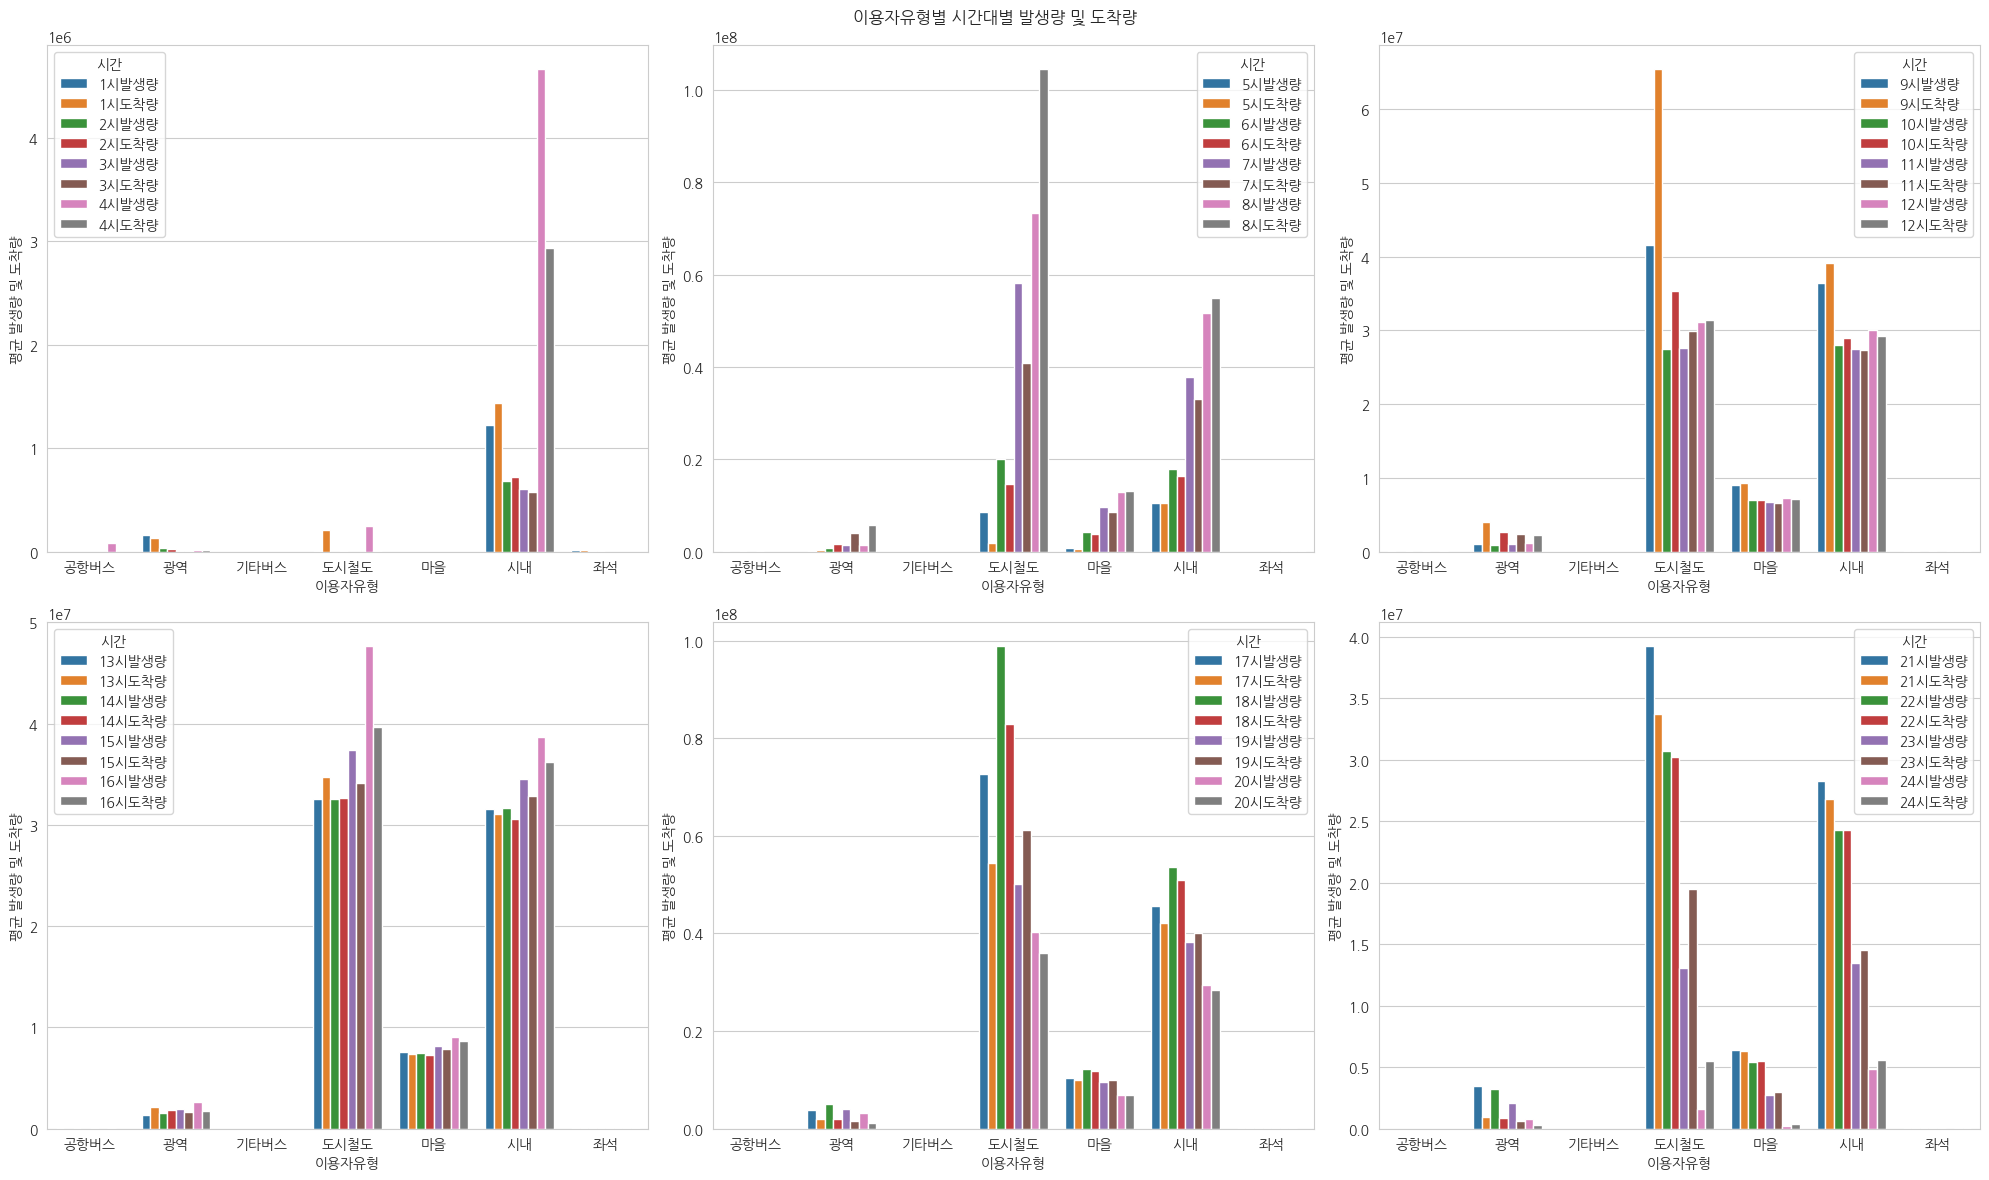

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

# 그룹별 평균 데이터 생성
mean_data = human.groupby("교통수단")[
    ['1시발생량', '1시도착량', '2시발생량', '2시도착량', '3시발생량', '3시도착량', 
     '4시발생량', '4시도착량', '5시발생량', '5시도착량', '6시발생량', '6시도착량', 
     '7시발생량', '7시도착량', '8시발생량', '8시도착량', '9시발생량', '9시도착량', 
     '10시발생량', '10시도착량', '11시발생량', '11시도착량', '12시발생량', '12시도착량', 
     '13시발생량', '13시도착량', '14시발생량', '14시도착량', '15시발생량', '15시도착량', 
     '16시발생량', '16시도착량', '17시발생량', '17시도착량', '18시발생량', '18시도착량', 
     '19시발생량', '19시도착량', '20시발생량', '20시도착량', '21시발생량', '21시도착량', 
     '22시발생량', '22시도착량', '23시발생량', '23시도착량', '24시발생량', '24시도착량']
].mean().reset_index()

# 그래프 그리기
plt.figure(figsize=(20, 12))

for i, hour in enumerate(range(1, 25, 4), start=1):
    # 서브플롯 추가
    plt.subplot(2, 3, i)
    
    # 해당 시간대 데이터 추출
    hour_columns = [f"{hour}시발생량", f"{hour}시도착량", f"{hour+1}시발생량", f"{hour+1}시도착량",
                    f"{hour+2}시발생량", f"{hour+2}시도착량", f"{hour+3}시발생량", f"{hour+3}시도착량"]
    hour_data = mean_data[['교통수단'] + hour_columns]
    
    # 시각화
    sns.barplot(data=hour_data.melt(id_vars='교통수단', var_name='시간', value_name='값'), x='교통수단', y='값', hue='시간')
    
    # 범례 표시
    plt.legend(title='시간')
    
    # x축 레이블 추가 (선택 사항)
    plt.xlabel('이용자유형')
    
    # y축 레이블 추가 (선택 사항)
    plt.ylabel('평균 발생량 및 도착량')

# 그래프 제목 추가 (선택 사항)
plt.suptitle('이용자유형별 시간대별 발생량 및 도착량')

# 그래프 보여주기
plt.tight_layout()  # 그래프 간격 조절 (선택 사항)
plt.show()


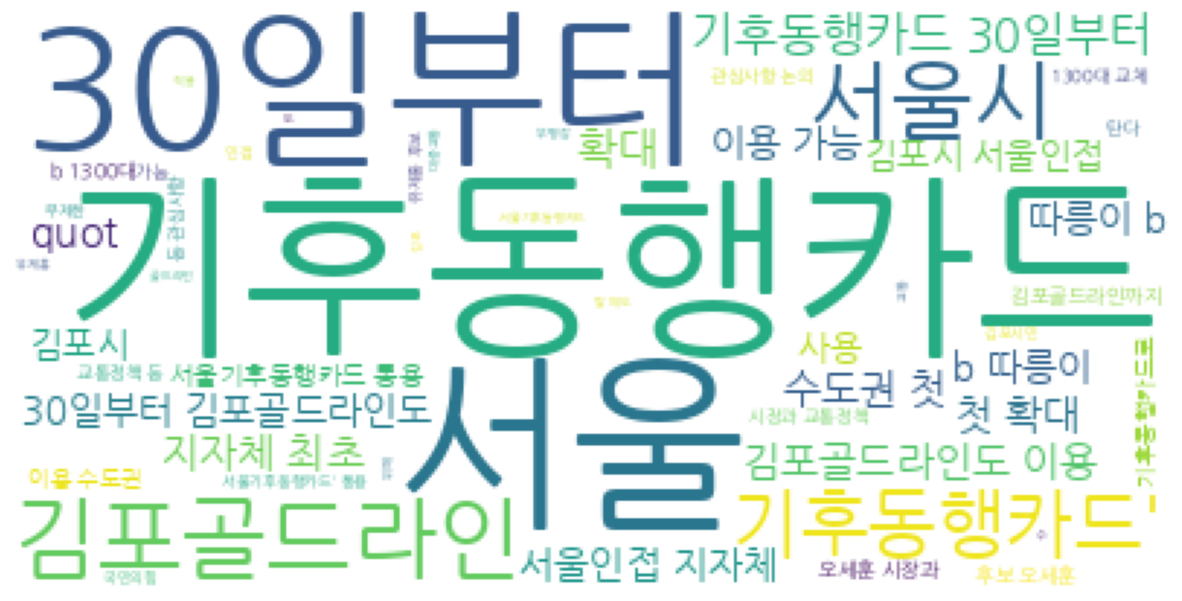

In [165]:
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt

url = 'https://openapi.naver.com/v1/search/news.json'
parameter = {
    'query': '따릉이',
    'display': '100'
}
myheader = {
    'X-Naver-Client-Id': 'Bbn2iIJQWzWWKWdr1JLQ',
    'X-Naver-Client-Secret': 'JXmAgAZO_6'
}

response = requests.get(url, params=parameter, headers=myheader)
data = response.json()

text_data = ' '.join([item['title'] for item in data['items']])

wc = WordCloud(font_path='/home/john/Downloads/나눔 글꼴/나눔고딕/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf', background_color='white').generate(text_data)

plt.figure(figsize=(15, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [1]:
import pandas as pd
import os

# 빈 DataFrame을 생성하여 df_total에 할당합니다.
df_seoul = pd.DataFrame()

# 1월 3일부터 1월 31일까지의 날짜를 반복합니다.
start_date = pd.Timestamp('2024-01-03')
end_date = pd.Timestamp('2024-01-31')
date_range = pd.date_range(start=start_date, end=end_date)

# 각 날짜에 해당하는 파일을 읽어와서 df_total에 추가합니다.
for date in date_range:
    file_path = f"../data/tpss_bcycl_od_statnhm_{date.strftime('%Y%m%d')}.csv"
    
    # 파일이 존재하는지 확인합니다.
    if os.path.exists(file_path):
        df_temp = pd.read_csv(file_path, encoding='cp949')
        df_seoul = pd.concat([df_seoul, df_temp], ignore_index=True)

# 결과 확인
df_seoul

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,종료_대여소_ID,종료_대여소명,전체_건수,전체_이용_분,전체_이용_거리
0,20240103,출발시간,0,ST-1006,목5동_054_1,ST-997,목4동_021_1,1,2,0
1,20240103,출발시간,0,ST-1029,녹번동_041_1,ST-459,녹번동_033_1,1,3,1460
2,20240103,출발시간,0,ST-1035,불광2동_021_1,ST-2783,갈현1동_039_2,1,4,253
3,20240103,출발시간,0,ST-1045,성내2동_007_1,ST-1684,풍납1동_012_1,1,4,730
4,20240103,출발시간,0,ST-1055,강일동_001_1,ST-504,강일동_002_6,1,121,13681
...,...,...,...,...,...,...,...,...,...,...
3691653,20240131,도착시간,2355,ST-840,잠실3동_018_1,ST-2991,잠실3동_023_1,1,3,562
3691654,20240131,도착시간,2355,ST-850,상봉2동_001_1,ST-1099,상봉2동_002_1,1,60,680
3691655,20240131,도착시간,2355,ST-95,상암동_022_1,ST-2905,망원1동_041_1,1,16,110
3691656,20240131,도착시간,2355,ST-987,자양3동_004_1,ST-259,구의2동_033_1,1,15,2260


In [2]:
df_id = pd.read_csv("../data/서울시 따릉이대여소 마스터 정보.csv", encoding = 'cp949')
df_id.head(1)

,대여소_ID,주소1,주소2,위도,경도
0,ST-999,서울특별시 양천구 목동서로 280,목동아파트 8단지 상가동,0.0,0.0


In [3]:
df_A = df_id.drop(columns = ['주소2'])
df_A

,대여소_ID,주소1,위도,경도
0,ST-999,서울특별시 양천구 목동서로 280,0.000000,0.000000
1,ST-998,서울특별시 양천구 목동서로 130,0.000000,0.000000
2,ST-997,서울특별시 양천구 목동중앙로 49,37.534390,126.869598
3,ST-996,서울특별시 양천구 남부순환로88길5-16,37.524334,126.850548
4,ST-995,서울특별시 양천구 중앙로 153 공중화장실,37.510597,126.857323
...,...,...,...,...
3266,ST-1002,서울특별시 양천구 목동동로 316-6,37.529900,126.876541
3267,ST-1001,서울특별시 양천구 남부순환로4길20,0.000000,0.000000
3268,ST-1000,서울특별시 양천구 신정동 236,37.510380,126.866798
3269,ST-100,서울특별시 광진구 아차산로 262,37.536667,127.073593


In [4]:
df_A = df_A.rename(columns = {'대여소_ID' : '시작 대여소', '주소1' : '시작 주소', '위도' : '시작 위도', '경도' : '시작 경도'})
df_A

,시작 대여소,시작 주소,시작 위도,시작 경도
0,ST-999,서울특별시 양천구 목동서로 280,0.000000,0.000000
1,ST-998,서울특별시 양천구 목동서로 130,0.000000,0.000000
2,ST-997,서울특별시 양천구 목동중앙로 49,37.534390,126.869598
3,ST-996,서울특별시 양천구 남부순환로88길5-16,37.524334,126.850548
4,ST-995,서울특별시 양천구 중앙로 153 공중화장실,37.510597,126.857323
...,...,...,...,...
3266,ST-1002,서울특별시 양천구 목동동로 316-6,37.529900,126.876541
3267,ST-1001,서울특별시 양천구 남부순환로4길20,0.000000,0.000000
3268,ST-1000,서울특별시 양천구 신정동 236,37.510380,126.866798
3269,ST-100,서울특별시 광진구 아차산로 262,37.536667,127.073593


In [5]:
df_B = df_id.drop(columns = ['주소2'])
df_B

,대여소_ID,주소1,위도,경도
0,ST-999,서울특별시 양천구 목동서로 280,0.000000,0.000000
1,ST-998,서울특별시 양천구 목동서로 130,0.000000,0.000000
2,ST-997,서울특별시 양천구 목동중앙로 49,37.534390,126.869598
3,ST-996,서울특별시 양천구 남부순환로88길5-16,37.524334,126.850548
4,ST-995,서울특별시 양천구 중앙로 153 공중화장실,37.510597,126.857323
...,...,...,...,...
3266,ST-1002,서울특별시 양천구 목동동로 316-6,37.529900,126.876541
3267,ST-1001,서울특별시 양천구 남부순환로4길20,0.000000,0.000000
3268,ST-1000,서울특별시 양천구 신정동 236,37.510380,126.866798
3269,ST-100,서울특별시 광진구 아차산로 262,37.536667,127.073593


In [6]:
df_B = df_B.rename(columns = {'대여소_ID' : '종료 대여소', '주소1' : '종료 주소', '위도' : '종료 위도', '경도' : '종료 경도'})
df_B

,종료 대여소,종료 주소,종료 위도,종료 경도
0,ST-999,서울특별시 양천구 목동서로 280,0.000000,0.000000
1,ST-998,서울특별시 양천구 목동서로 130,0.000000,0.000000
2,ST-997,서울특별시 양천구 목동중앙로 49,37.534390,126.869598
3,ST-996,서울특별시 양천구 남부순환로88길5-16,37.524334,126.850548
4,ST-995,서울특별시 양천구 중앙로 153 공중화장실,37.510597,126.857323
...,...,...,...,...
3266,ST-1002,서울특별시 양천구 목동동로 316-6,37.529900,126.876541
3267,ST-1001,서울특별시 양천구 남부순환로4길20,0.000000,0.000000
3268,ST-1000,서울특별시 양천구 신정동 236,37.510380,126.866798
3269,ST-100,서울특별시 광진구 아차산로 262,37.536667,127.073593


In [7]:
df_start = pd.merge(df_seoul, df_A, how='left', left_on='시작_대여소_ID', right_on='시작 대여소')

df_start.head()

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,종료_대여소_ID,종료_대여소명,전체_건수,전체_이용_분,전체_이용_거리,시작 대여소,시작 주소,시작 위도,시작 경도
0,20240103,출발시간,0,ST-1006,목5동_054_1,ST-997,목4동_021_1,1,2,0,ST-1006,서울특별시 양천구 목동중앙로 70 서울영도초등학교,37.536377,126.871513
1,20240103,출발시간,0,ST-1029,녹번동_041_1,ST-459,녹번동_033_1,1,3,1460,ST-1029,서울특별시 녹번동 84,37.602402,126.928650
2,20240103,출발시간,0,ST-1035,불광2동_021_1,ST-2783,갈현1동_039_2,1,4,253,ST-1035,서울특별시 불광동 487-2,37.619781,126.920807
3,20240103,출발시간,0,ST-1045,성내2동_007_1,ST-1684,풍납1동_012_1,1,4,730,ST-1045,서울특별시 강동구 천호옛길 41 포레스아파트,37.533108,127.122772
4,20240103,출발시간,0,ST-1055,강일동_001_1,ST-504,강일동_002_6,1,121,13681,ST-1055,서울특별시 강동구 강일동 667-4,37.568638,127.174805


In [8]:
df_total = pd.merge(df_start, df_B, how='left', left_on='시작_대여소_ID', right_on='종료 대여소')

df_total.head()

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,종료_대여소_ID,종료_대여소명,전체_건수,전체_이용_분,전체_이용_거리,시작 대여소,시작 주소,시작 위도,시작 경도,종료 대여소,종료 주소,종료 위도,종료 경도
0,20240103,출발시간,0,ST-1006,목5동_054_1,ST-997,목4동_021_1,1,2,0,ST-1006,서울특별시 양천구 목동중앙로 70 서울영도초등학교,37.536377,126.871513,ST-1006,서울특별시 양천구 목동중앙로 70 서울영도초등학교,37.536377,126.871513
1,20240103,출발시간,0,ST-1029,녹번동_041_1,ST-459,녹번동_033_1,1,3,1460,ST-1029,서울특별시 녹번동 84,37.602402,126.928650,ST-1029,서울특별시 녹번동 84,37.602402,126.928650
2,20240103,출발시간,0,ST-1035,불광2동_021_1,ST-2783,갈현1동_039_2,1,4,253,ST-1035,서울특별시 불광동 487-2,37.619781,126.920807,ST-1035,서울특별시 불광동 487-2,37.619781,126.920807
3,20240103,출발시간,0,ST-1045,성내2동_007_1,ST-1684,풍납1동_012_1,1,4,730,ST-1045,서울특별시 강동구 천호옛길 41 포레스아파트,37.533108,127.122772,ST-1045,서울특별시 강동구 천호옛길 41 포레스아파트,37.533108,127.122772
4,20240103,출발시간,0,ST-1055,강일동_001_1,ST-504,강일동_002_6,1,121,13681,ST-1055,서울특별시 강동구 강일동 667-4,37.568638,127.174805,ST-1055,서울특별시 강동구 강일동 667-4,37.568638,127.174805


In [9]:
df = df_total.rename(columns = {'기준_날짜' : '날짜', '집계_기준' : '기준', '기준_시간대' : '시간대', '시작_대여소_ID' : '시작 대여소 ID', '시작_대여소명' : '삭제1', 
                                '종료_대여소_ID' : '종료 대여소 ID', '종료_대여소명' : '삭제2', '전체_건수' : '건수', '전체_이용_분' : '이용시간', '전체_이용_거리' : '이용거리',
                                '시작 대여소' : '삭제3', '종료 대여소' : '삭제4'})

In [10]:
df = df.drop(columns = ['삭제1', '삭제2', '삭제3', '삭제4'])
df

,날짜,기준,시간대,시작 대여소 ID,종료 대여소 ID,건수,이용시간,이용거리,시작 주소,시작 위도,시작 경도,종료 주소,종료 위도,종료 경도
0,20240103,출발시간,0,ST-1006,ST-997,1,2,0,서울특별시 양천구 목동중앙로 70 서울영도초등학교,37.536377,126.871513,서울특별시 양천구 목동중앙로 70 서울영도초등학교,37.536377,126.871513
1,20240103,출발시간,0,ST-1029,ST-459,1,3,1460,서울특별시 녹번동 84,37.602402,126.928650,서울특별시 녹번동 84,37.602402,126.928650
2,20240103,출발시간,0,ST-1035,ST-2783,1,4,253,서울특별시 불광동 487-2,37.619781,126.920807,서울특별시 불광동 487-2,37.619781,126.920807
3,20240103,출발시간,0,ST-1045,ST-1684,1,4,730,서울특별시 강동구 천호옛길 41 포레스아파트,37.533108,127.122772,서울특별시 강동구 천호옛길 41 포레스아파트,37.533108,127.122772
4,20240103,출발시간,0,ST-1055,ST-504,1,121,13681,서울특별시 강동구 강일동 667-4,37.568638,127.174805,서울특별시 강동구 강일동 667-4,37.568638,127.174805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3691653,20240131,도착시간,2355,ST-840,ST-2991,1,3,562,서울특별시 송파구 석촌호수로12길 3-5,37.514088,127.099030,서울특별시 송파구 석촌호수로12길 3-5,37.514088,127.099030
3691654,20240131,도착시간,2355,ST-850,ST-1099,1,60,680,서울특별시 중랑구 면목로 480,37.595219,127.085999,서울특별시 중랑구 면목로 480,37.595219,127.085999
3691655,20240131,도착시간,2355,ST-95,ST-2905,1,16,110,서울특별시 마포구 성암로 지하184,37.577469,126.897362,서울특별시 마포구 성암로 지하184,37.577469,126.897362
3691656,20240131,도착시간,2355,ST-987,ST-259,1,15,2260,서울특별시 광진구 아차산로 304,37.538052,127.076599,서울특별시 광진구 아차산로 304,37.538052,127.076599


<Axes: xlabel='날짜'>

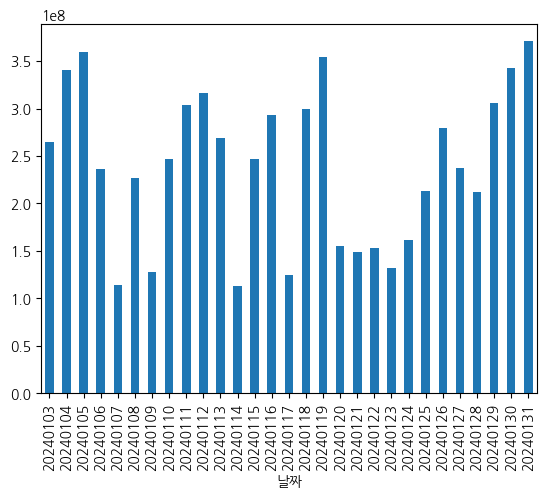

In [12]:
df.groupby("날짜")["이용거리"].sum().plot.bar()

In [13]:
len(df['시간대'].unique())

288

In [14]:
df['시간대'].value_counts().head(10)

시간대
1805    37597
1810    35647
845     33394
1815    33124
850     32229
840     31959
1820    31915
1800    29913
1825    29696
835     29040
Name: count, dtype: int64

<Axes: xlabel='시간대'>

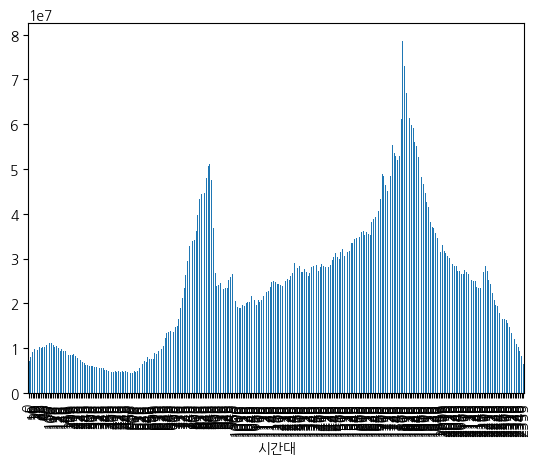

In [16]:
df.groupby("시간대")["이용거리"].sum().plot.bar()

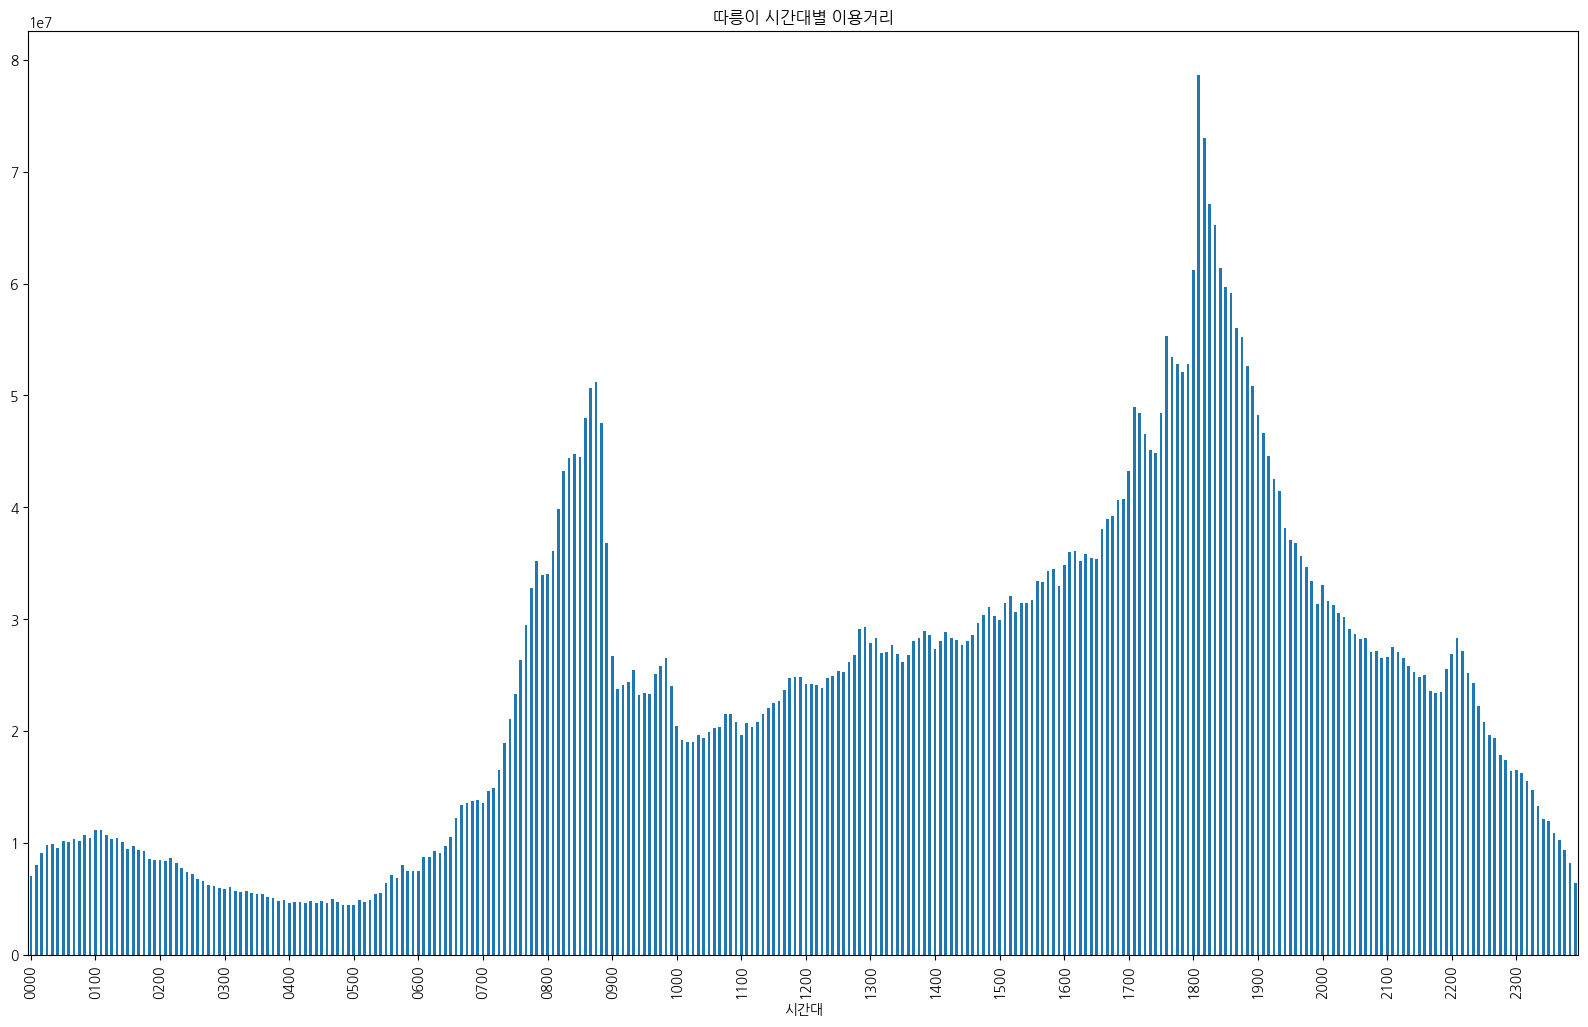

In [21]:
ax = df.groupby("시간대")["이용거리"].sum().plot(kind='bar', figsize=(20, 12))

custom_ticks = [0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144, 156, 168, 180,
                192, 204, 216, 228, 240, 252, 264, 276]
custom_labels = ['0000', '0100', '0200', '0300', '0400', '0500', '0600', '0700', '0800',
                 '0900', '1000', '1100', '1200', '1300', '1400', '1500', '1600', '1700',
                 '1800', '1900', '2000', '2100', '2200', '2300']
plt.xticks(custom_ticks, custom_labels, rotation=90)
plt.title('따릉이 시간대별 이용거리')
plt.show()

In [138]:
df_coor = pd.read_excel('../data/지하철노선위경도정보.xlsx')
df_coor.rename(columns={'역이름': 'name',
                        'Unnamed: 2': 'latitude',
                        'Unnamed: 3': 'longitude',
                        '호선': 'line'}, inplace=True)
df_coor

,name,역지역,latitude,longitude,line
0,낙성대역,수도권,37.48,126.96,02호선
1,구룡역,수도권,37.49,127.06,분당선
2,서울대입구역,수도권,37.48,126.95,02호선
3,불광역,수도권,37.61,126.93,03호선
4,월롱역,수도권,37.80,126.79,경의선
...,...,...,...,...,...
970,현충원역,대전,36.36,127.32,01호선
971,월드컵경기장역,대전,36.37,127.32,01호선
972,노은역,대전,36.37,127.32,01호선
973,지족역,대전,36.38,127.32,01호선


In [151]:
import mysql.connector

conn = mysql.connector.connect(
    host='database-1.c3ieyo8m4v9o.ap-northeast-2.rds.amazonaws.com',
    port=3306,
    user='eda_team',
    password='123456',
    database='eda_project'
)

cur = conn.cursor()

# CREATE TABLE 쿼리 수정
cur.execute("""CREATE TABLE IF NOT EXISTS gihu_coor (
                    name VARCHAR(128),
                    역지역 VARCHAR(128),
                    latitude float,
                    longitude float,
                    line varchar(128)
              )""")
cursor = conn.cursor()
# INSERT INTO 쿼리 수정
sql = "INSERT INTO gihu_coor VALUES (%s, %s, %s, %s, %s)"

In [152]:
for i, row in df_coor.iterrows():
    cursor.execute(sql, tuple(row))
    print(tuple(row))
    conn.commit()

('낙성대역', '수도권', 37.4770896313732, 126.963505817942, '02호선')
('구룡역', '수도권', 37.48702743532, 127.059474850454, '분당선')
('서울대입구역', '수도권', 37.4812845008265, 126.952695107942, '02호선')
('불광역', '수도권', 37.6100441859992, 126.930302239049, '03호선')
('월롱역', '수도권', 37.7962037866501, 126.792563197953, '경의선')
('안국역', '수도권', 37.5764929103816, 126.985419169939, '03호선')
('부발역', '수도권', 37.2603924025665, 127.490307974918, '경강선')
('강변역', '수도권', 37.535118053119, 127.094722999066, '02호선')
('영등포구청역', '수도권', 37.5258305232222, 126.896668349116, '02호선')
('동대입구역', '수도권', 37.5590504141329, 127.005296768227, '03호선')
('잠실새내역', '수도권', 37.5116083485804, 127.08630073432, '02호선')
('당산역', '수도권', 37.5347735014069, 126.902607283905, '02호선')
('약수역', '수도권', 37.5544909839515, 127.010887137982, '03호선')
('충정로역', '수도권', 37.5597479688989, 126.964484159441, '02호선')
('녹번역', '수도권', 37.6008031568325, 126.935814422277, '03호선')
('종합운동장역', '수도권', 37.5111302556967, 127.07383586044, '02호선')
('합정역', '수도권', 37.549901442065, 126.914447288631,

In [153]:
conn.close()

In [154]:
df_coor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       975 non-null    object 
 1   역지역        975 non-null    object 
 2   latitude   975 non-null    float64
 3   longitude  975 non-null    float64
 4   line       975 non-null    object 
dtypes: float64(2), object(3)
memory usage: 38.2+ KB


In [156]:
df_coor['name'].value_counts()

name
시청역     4
서울역     4
교대역     4
청량리역    4
왕십리역    4
       ..
방화역     1
개화산역    1
송정역     1
마곡역     1
반석역     1
Name: count, Length: 828, dtype: int64

In [157]:
df_coor[df_coor['name'] == '시청역']

,name,역지역,latitude,longitude,line
59,시청역,수도권,37.57,126.98,02호선
722,시청역,수도권,37.57,126.98,01호선
754,시청역,부산,35.18,129.08,01호선
963,시청역,대전,36.35,127.39,01호선


In [159]:
df_gihu1

,이름,노선,승차가능,하차가능,판매여부,충전여부,사용정지
0,가산디지털단지,1호선,O,O,X,X,X
1,간석,1호선,X,X,X,X,X
2,개봉,1호선,O,O,X,X,X
3,관악,1호선,X,X,X,X,X
4,광명,1호선,X,X,X,X,X
...,...,...,...,...,...,...,...
677,솔밭공원,우이신설,O,O,X,O,O
678,솔샘,우이신설,O,O,X,O,O
679,신설동,우이신설,O,O,X,O,O
680,정릉,우이신설,O,O,X,O,O


In [160]:
df_gihu2

,노선번호,승하차
0,0017,O
1,01A,O
2,01B,O
3,0411,O
4,100,O
...,...,...
627,종로11,O
628,종로12,O
629,종로13,O
630,중랑01,O


In [162]:
df_coor

,name,역지역,latitude,longitude,line
0,낙성대역,수도권,37.48,126.96,02호선
1,구룡역,수도권,37.49,127.06,분당선
2,서울대입구역,수도권,37.48,126.95,02호선
3,불광역,수도권,37.61,126.93,03호선
4,월롱역,수도권,37.80,126.79,경의선
...,...,...,...,...,...
970,현충원역,대전,36.36,127.32,01호선
971,월드컵경기장역,대전,36.37,127.32,01호선
972,노은역,대전,36.37,127.32,01호선
973,지족역,대전,36.38,127.32,01호선


In [164]:
df_coor['역지역'].value_counts()

역지역
수도권    728
부산     114
대구      91
대전      22
광주      20
Name: count, dtype: int64

# commit test!